In [ ]:
##-- 線形回帰

In [88]:
## インポート
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [89]:
## データセット
cust_attr = pd.read_csv('./data/jupyter/cust_attr.csv')
cust_attr = cust_attr[cust_attr.columns.drop(list(cust_attr.filter(regex='Unnamed:')))]

sales = pd.read_csv('./data/jupyter/sales.csv')
sales = sales[sales.columns.drop(list(sales.filter(regex='Unnamed:')))]

cust_attr[:5]

,顧客ID,生年月日,性別,携帯TEL,自宅TEL,携帯メール,PCメール,職業,キャンセル回数,コンタクト回数,問い合わせ回数,閲覧ページ総数,セッション時間,予約回数
0,000112093,1982-02-10,女,有,無,無,有,会社員,NaN,NaN,NaN,82,61.0,1.0
1,000121059,1983-08-06,女,有,有,有,有,会社員,NaN,NaN,NaN,103,76.0,1.0
2,000321123,1980-08-04,女,有,有,無,有,会社員,NaN,NaN,NaN,1,0.0,3.0
3,000331001,1969-10-17,女,有,有,無,有,会社員,NaN,NaN,NaN,142,90.0,1.0
4,000431039,1965-09-20,男,有,無,無,有,会社員,NaN,NaN,NaN,4,2.0,NaN


In [90]:
sales[:5]

,更新日時,登録日時,状況,伝票コード,明細コード,伝票区分,会計日,締日,来店日,開始時刻,...,請求単価,数量,単位,売上区分,商品区分,変更区分,明細備考,汎用備考,売上,明細ID
0,2018-09-09 14:06:55,2018-09-09 08:49:22,確定済,143000022090,1,通常,2018-09-09,2018-09-09,2018-09-09,12:30,...,8640,1,NaN,WEケア,単品,可,NaN,NaN,8640,1430000220901
1,2018-09-09 14:06:55,2018-09-09 08:49:22,確定済,143000022090,2,通常,2018-09-09,2018-09-09,2018-09-09,12:30,...,540,1,NaN,WEケア,オプション,可,NaN,NaN,540,1430000220902
2,2018-09-09 14:06:55,2018-09-09 08:49:22,確定済,143000022090,3,通常,2018-09-09,2018-09-09,2018-09-09,12:30,...,1944,1,NaN,WE物販,物販,可,NaN,NaN,1944,1430000220903
3,2018-09-24 12:20:42,2018-09-24 09:47:20,確定済,38000032362,1,通常,2018-09-24,2018-09-24,2018-09-24,11:00,...,8640,1,NaN,WEケア,単品,可,NaN,NaN,8640,380000323621
4,2018-09-24 12:20:42,2018-09-24 09:47:20,確定済,38000032362,2,通常,2018-09-24,2018-09-24,2018-09-24,11:00,...,3240,1,NaN,WEケア,オプション,可,NaN,NaN,3240,380000323622


In [91]:
# 1. カテゴリデータ変換・補完
#df.cust_gender = df.cust_gender.replace({np.nan:'N'})
#df.cust_job = df.cust_job.replace({np.nan:'N'})
#df.cust_tel = df.cust_tel.replace({0:'N', 1:'Y'})
#df.cust_mail = df.cust_mail.replace({0:'N', 1:'Y'})
#df.query("cust_tel == 'N' or cust_mail == 'N'")[:10]

In [92]:
## 1.1. salesの売上データを集計

## 売上列を追加
sales['売上'] = sales['売上単価'] * sales['数量']

## 個別商品の売上を特定する列を追加
sales['明細ID'] = sales['伝票コード'] * 10 + sales['明細コード']

sales[:5]

,更新日時,登録日時,状況,伝票コード,明細コード,伝票区分,会計日,締日,来店日,開始時刻,...,請求単価,数量,単位,売上区分,商品区分,変更区分,明細備考,汎用備考,売上,明細ID
0,2018-09-09 14:06:55,2018-09-09 08:49:22,確定済,143000022090,1,通常,2018-09-09,2018-09-09,2018-09-09,12:30,...,8640,1,NaN,WEケア,単品,可,NaN,NaN,8640,1430000220901
1,2018-09-09 14:06:55,2018-09-09 08:49:22,確定済,143000022090,2,通常,2018-09-09,2018-09-09,2018-09-09,12:30,...,540,1,NaN,WEケア,オプション,可,NaN,NaN,540,1430000220902
2,2018-09-09 14:06:55,2018-09-09 08:49:22,確定済,143000022090,3,通常,2018-09-09,2018-09-09,2018-09-09,12:30,...,1944,1,NaN,WE物販,物販,可,NaN,NaN,1944,1430000220903
3,2018-09-24 12:20:42,2018-09-24 09:47:20,確定済,38000032362,1,通常,2018-09-24,2018-09-24,2018-09-24,11:00,...,8640,1,NaN,WEケア,単品,可,NaN,NaN,8640,380000323621
4,2018-09-24 12:20:42,2018-09-24 09:47:20,確定済,38000032362,2,通常,2018-09-24,2018-09-24,2018-09-24,11:00,...,3240,1,NaN,WEケア,オプション,可,NaN,NaN,3240,380000323622


In [93]:
## 売上情報を顧客IDごとに集計

sales_data = sales.groupby('顧客ID')['売上'].sum()
sales_data[:5]

顧客ID
112093    11124
121059    15120
321123      869
331001    11016
431039    14364
Name: 売上, dtype: int64

In [94]:
## 売上情報を集計

sales_data = sales_data.to_frame(name='売上')
sales_data = sales_data.reset_index()
sales_data.columns = ['顧客ID','売上']
sales_data[:5]

,顧客ID,売上
0,112093,11124
1,121059,15120
2,321123,869
3,331001,11016
4,431039,14364


In [95]:
## 売上情報を顧客属性とマージ

cust_attr = pd.merge(cust_attr, sales_data, on='顧客ID', how='left')

cust_attr[:5]

,顧客ID,生年月日,性別,携帯TEL,自宅TEL,携帯メール,PCメール,職業,キャンセル回数,コンタクト回数,問い合わせ回数,閲覧ページ総数,セッション時間,予約回数,売上
0,000112093,1982-02-10,女,有,無,無,有,会社員,NaN,NaN,NaN,82,61.0,1.0,NaN
1,000121059,1983-08-06,女,有,有,有,有,会社員,NaN,NaN,NaN,103,76.0,1.0,NaN
2,000321123,1980-08-04,女,有,有,無,有,会社員,NaN,NaN,NaN,1,0.0,3.0,NaN
3,000331001,1969-10-17,女,有,有,無,有,会社員,NaN,NaN,NaN,142,90.0,1.0,NaN
4,000431039,1965-09-20,男,有,無,無,有,会社員,NaN,NaN,NaN,4,2.0,NaN,NaN


In [96]:
## 1.2. 売上属性取得し、顧客属性とマージ

## 売上1回あたりの情報が欲しいので、明細コード=1のレコードを抽出
## salesは売上1回の中で複数の商品が買われた場合、顧客属性情報が重複して格納される

## 明細コード=1のレコードを中出
sales_attr = sales.query('明細コード == 1')

## 属性情報のみ抽出し、cust_attrにマージ
cust_attr = pd.merge(cust_attr, sales_attr[['顧客ID','指名回数','コース受諾回数','紹介カード受渡回数','治療送客回数','院長挨拶回数']], on='顧客ID', how='left')

cust_attr[:5]



,顧客ID,生年月日,性別,携帯TEL,自宅TEL,携帯メール,PCメール,職業,キャンセル回数,コンタクト回数,問い合わせ回数,閲覧ページ総数,セッション時間,予約回数,売上,指名回数,コース受諾回数,紹介カード受渡回数,治療送客回数,院長挨拶回数
0,000112093,1982-02-10,女,有,無,無,有,会社員,NaN,NaN,NaN,82,61.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,000121059,1983-08-06,女,有,有,有,有,会社員,NaN,NaN,NaN,103,76.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,000321123,1980-08-04,女,有,有,無,有,会社員,NaN,NaN,NaN,1,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,000331001,1969-10-17,女,有,有,無,有,会社員,NaN,NaN,NaN,142,90.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,000431039,1965-09-20,男,有,無,無,有,会社員,NaN,NaN,NaN,4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
## 1.2. 生年月日をビニングする

## プログラム実行日から何年経過しているのか計算
df_age = cust_attr.drop(cust_attr[cust_attr['生年月日'].str.contains('\*', na=True)].index)
df_age['生年月日'] = pd.to_datetime(df_age['生年月日']).dt.strftime('%Y%m%d').astype(np.int64)
df_age['生年月日'] = ((
    int(pd.to_datetime('today').strftime('%Y%m%d'))
    - df_age['生年月日'])/1000).astype(np.int64)

## 10〜50にビニングする
cust_attr['年齢'] = pd.cut(df_age['生年月日'], bins=[0,10,20,30,40,50], labels=['10','20','30','40','50'])

## 不要な生年月日列を削除する
cust_attr = cust_attr.drop(['生年月日'], axis=1)

cust_attr[:5]

,顧客ID,性別,携帯TEL,自宅TEL,携帯メール,PCメール,職業,キャンセル回数,コンタクト回数,問い合わせ回数,閲覧ページ総数,セッション時間,予約回数,売上,指名回数,コース受諾回数,紹介カード受渡回数,治療送客回数,院長挨拶回数,年齢
0,000112093,女,有,無,無,有,会社員,NaN,NaN,NaN,82,61.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000121059,女,有,有,有,有,会社員,NaN,NaN,NaN,103,76.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000321123,女,有,有,無,有,会社員,NaN,NaN,NaN,1,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000331001,女,有,有,無,有,会社員,NaN,NaN,NaN,142,90.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000431039,男,有,無,無,有,会社員,NaN,NaN,NaN,4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
## 1.3. カテゴリデータを特徴量に変換

## カテゴリ列を抽出
feat_cust_attr = cust_attr[['顧客ID','年齢','性別','携帯TEL','自宅TEL','携帯メール','PCメール','職業','指名回数','コース受諾回数','紹介カード受渡回数','治療送客回数','院長挨拶回数']]

## cust_attrからカテゴリ列を削除
serial_cust_attr = cust_attr.drop(['年齢','性別','携帯TEL','自宅TEL','携帯メール','PCメール','職業','指名回数','コース受諾回数','紹介カード受渡回数','治療送客回数','院長挨拶回数'],axis=1)

## OneHotEncodeしたい列を指定
onehot = ce.OneHotEncoder(
    cols=['年齢','性別','携帯TEL','自宅TEL','携帯メール','PCメール','職業','指名回数','コース受諾回数','紹介カード受渡回数','治療送客回数','院長挨拶回数'],
    handle_unknown='impute')

## OneHotEncoderを適用 
feat_cust_attr = onehot.fit_transform(feat_cust_attr).fillna(0)

feat_cust_attr[:5]

,年齢_1,年齢_2,年齢_-1,性別_1,性別_2,性別_3,性別_-1,携帯TEL_1,携帯TEL_2,携帯TEL_-1,...,紹介カード受渡回数_-1,治療送客回数_1,治療送客回数_2,治療送客回数_3,治療送客回数_-1,院長挨拶回数_1,院長挨拶回数_2,院長挨拶回数_3,院長挨拶回数_-1,顧客ID
0,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,000112093
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,000121059
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,000321123
3,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,000331001
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,000431039


In [99]:
serial_cust_attr[:5]

,顧客ID,キャンセル回数,コンタクト回数,問い合わせ回数,閲覧ページ総数,セッション時間,予約回数,売上
0,000112093,NaN,NaN,NaN,82,61.0,1.0,NaN
1,000121059,NaN,NaN,NaN,103,76.0,1.0,NaN
2,000321123,NaN,NaN,NaN,1,0.0,3.0,NaN
3,000331001,NaN,NaN,NaN,142,90.0,1.0,NaN
4,000431039,NaN,NaN,NaN,4,2.0,NaN,NaN


In [146]:
## 1.4. 特徴量データにラベル付与

## 初期化
feat_cust_attr_col = []

## ラベル付与処理
for col in ['年齢','性別','携帯TEL','自宅TEL','携帯メール','PCメール','職業','指名回数','コース受諾回数','紹介カード受渡回数','治療送客回数','院長挨拶回数']:
    
    ## 初期化
    le = LabelEncoder()
    le.fit_transform(cust_attr[col].astype(str))
    name_list = []
    
    ## ラベル名を付与
    for label in le.classes_:
        label = col + '_' + label
        name_list.append(label)
    else:
        name_list.append(col + '_空欄')
        
    feat_cust_attr_col += name_list
else:
    feat_cust_attr_col += ['顧客ID']

## ラベル付与 
feat_cust_attr.columns = feat_cust_attr_col

## featとserialをマージ
df = pd.merge(serial_cust_attr, feat_cust_attr, on='顧客ID', how='left')

## 欠損値をゼロ埋め
df = df.fillna(0)

## 顧客IDは不要なので削除
df = df.drop(['顧客ID'],axis=1)

df[:5]

,キャンセル回数,コンタクト回数,問い合わせ回数,閲覧ページ総数,セッション時間,予約回数,年齢_10,年齢_nan,年齢_空欄,性別_nan,...,紹介カード受渡回数_なし,紹介カード受渡回数_空欄,治療送客回数_nan,治療送客回数_あり,治療送客回数_なし,治療送客回数_空欄,院長挨拶回数_nan,院長挨拶回数_あり,院長挨拶回数_なし,院長挨拶回数_空欄
0,0.0,0.0,0.0,82,61.0,1.0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,0.0,0.0,0.0,103,76.0,1.0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0.0,0.0,0.0,1,0.0,3.0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0.0,0.0,0.0,142,90.0,1.0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0.0,0.0,0.0,4,2.0,0.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [147]:
# 抜け値除外
#df[df.isnull().any(1)][:10]

In [148]:
# 外れ値除外
#df.describe(percentiles=[0.01, 0.50, 0.99])

In [149]:
df.columns

Index(['キャンセル回数', 'コンタクト回数', '問い合わせ回数', '閲覧ページ総数', 'セッション時間', '予約回数', '年齢_10',
       '年齢_nan', '年齢_空欄', '性別_nan', '性別_女', '性別_男', '性別_空欄', '携帯TEL_有',
       '携帯TEL_無', '携帯TEL_空欄', '自宅TEL_有', '自宅TEL_無', '自宅TEL_空欄', '携帯メール_有',
       '携帯メール_無', '携帯メール_空欄', 'PCメール_有', 'PCメール_無', 'PCメール_空欄', '職業_nan',
       '職業_その他', '職業_パート・アルバイト', '職業_主婦', '職業_会社員', '職業_学生', '職業_自営業', '職業_空欄',
       '指名回数_nan', '指名回数_あり', '指名回数_なし', '指名回数_空欄', 'コース受諾回数_nan',
       'コース受諾回数_あり', 'コース受諾回数_なし', 'コース受諾回数_空欄', '紹介カード受渡回数_nan',
       '紹介カード受渡回数_あり', '紹介カード受渡回数_なし', '紹介カード受渡回数_空欄', '治療送客回数_nan',
       '治療送客回数_あり', '治療送客回数_なし', '治療送客回数_空欄', '院長挨拶回数_nan', '院長挨拶回数_あり',
       '院長挨拶回数_なし', '院長挨拶回数_空欄'],
      dtype='object')

<IPython.core.display.Javascript object>


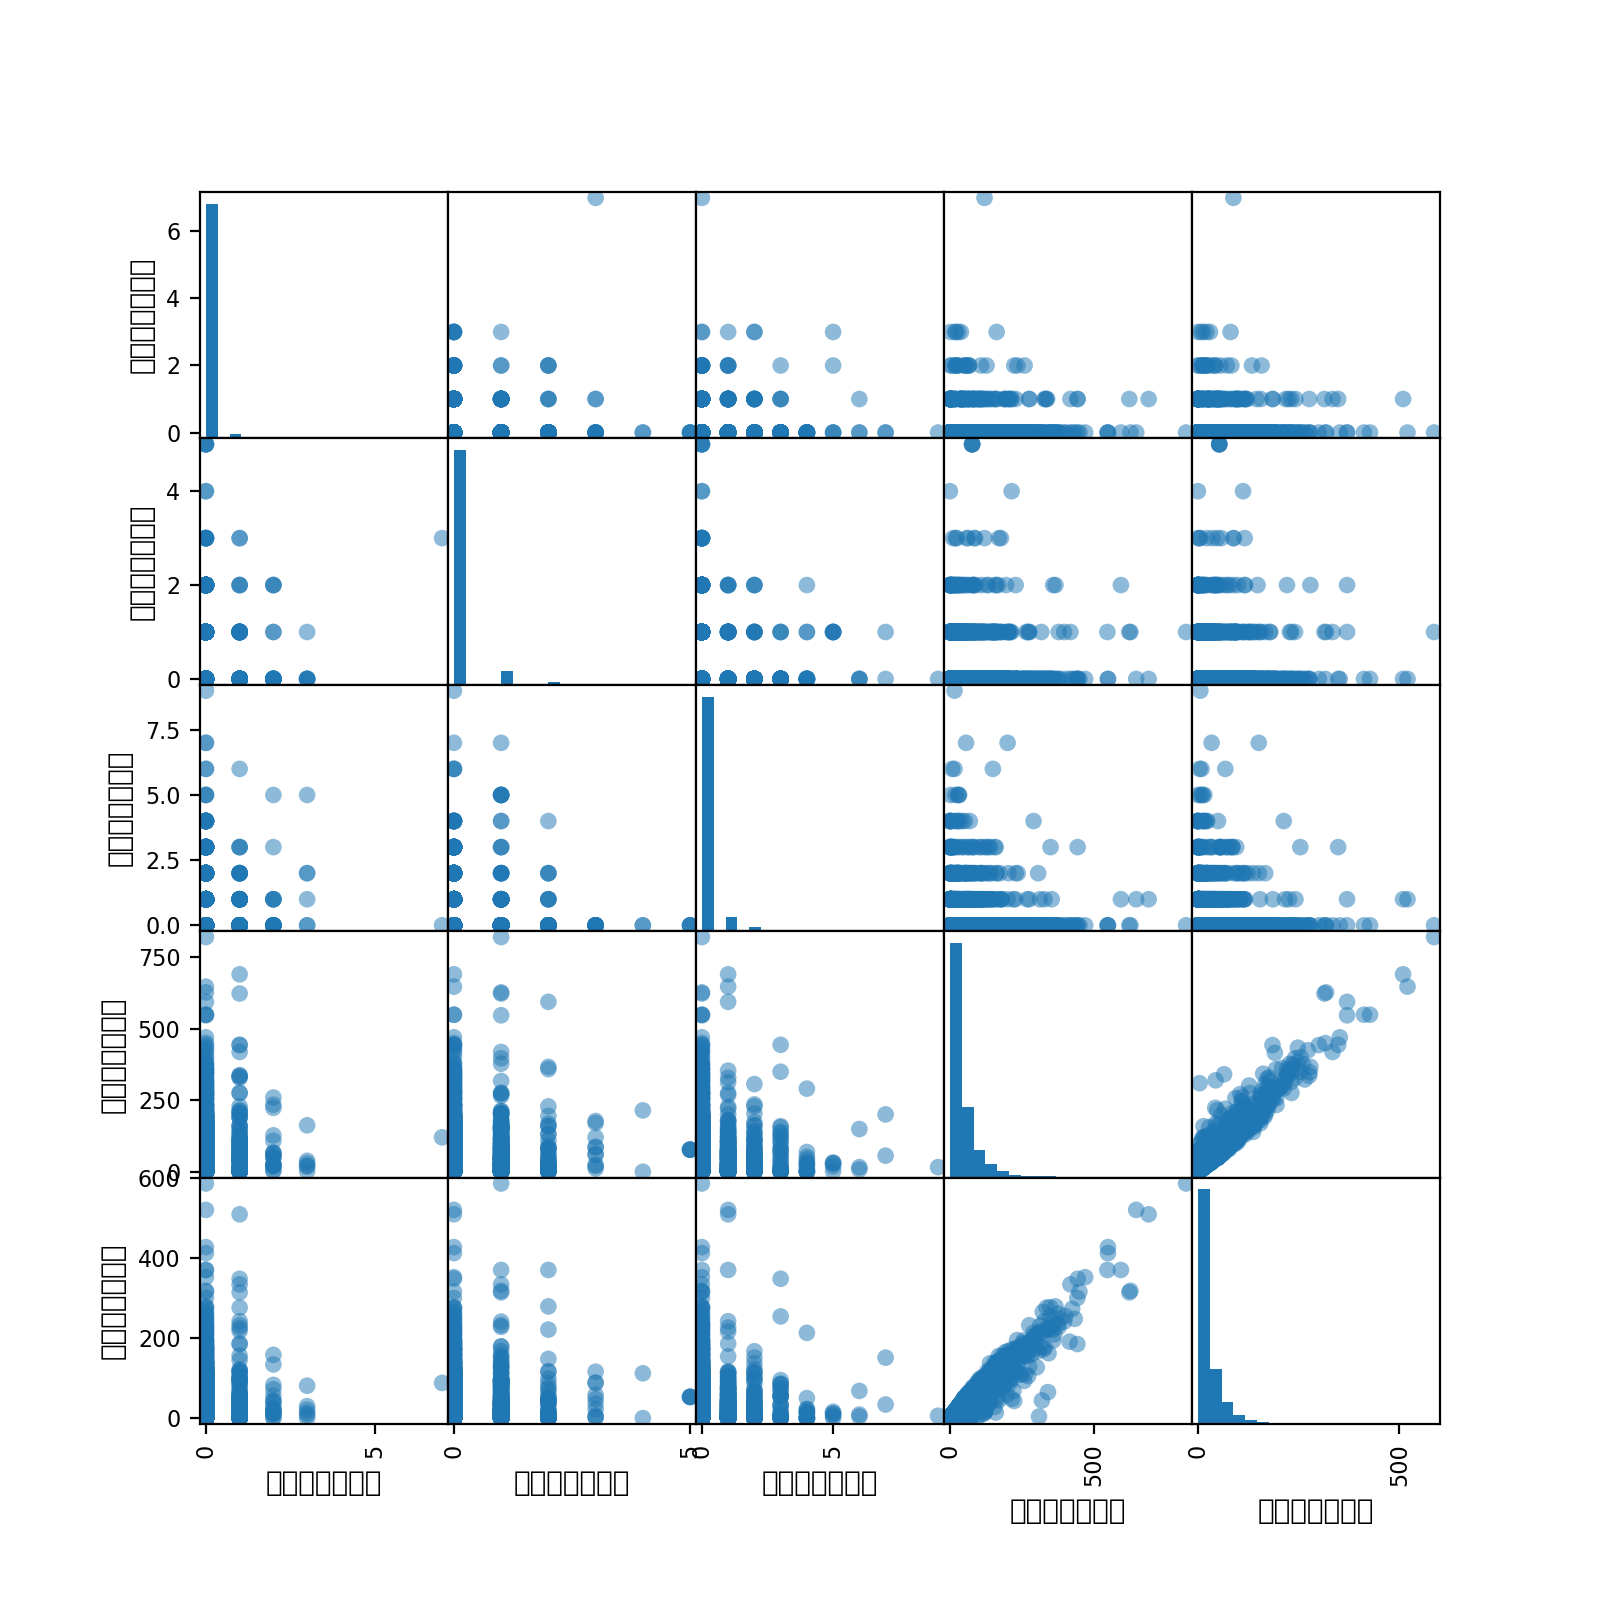

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a390590b8>,
      dtype=object)

In [150]:
# プロット
pd.plotting.scatter_matrix(df.iloc[:, :5], figsize = (8, 8), hist_kwds = {'bins': 20}, marker = 'o')

In [137]:
# 特徴変数
#X = df.iloc[:, 1:].values
#y = df.iloc[:, 0].values
x = df.drop(['売上'],axis=1)
y = df['売上']
type(X), X.shape, X, type(y), y.shape, y

(numpy.ndarray, (5009, 53), array([[  0.,   0.,  82., ...,   0.,   0.,   0.],
        [  0.,   0., 103., ...,   0.,   0.,   0.],
        [  0.,   0.,   1., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0., 173., ...,   1.,   0.,   0.],
        [  0.,   0., 113., ...,   1.,   0.,   0.],
        [  0.,   0.,  49., ...,   1.,   0.,   0.]]), pandas.core.series.Series, (5009,), 0           0.0
 1           0.0
 2           0.0
 3           0.0
 4           0.0
 5           0.0
 6           0.0
 7           0.0
 8           0.0
 9           0.0
 10          0.0
 11          0.0
 12          0.0
 13          0.0
 14          0.0
 15          0.0
 16          0.0
 17          0.0
 18          0.0
 19          0.0
 20          0.0
 21          0.0
 22          0.0
 23          0.0
 24          0.0
 25          0.0
 26          0.0
 27          0.0
 28          0.0
 29          0.0
          ...   
 4979    10800.0
 4980     8640.0
 4981    18360.0
 4982    16200.0
 4983     8640.0
 4984

In [138]:
## 標準化・正規化
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#ss = StandardScaler()
#ss = MinMaxScaler()
#X = ss.fit_transform(X)

In [139]:
## 訓練・テストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape


((3756, 53), (3756,))

In [140]:
## 学習
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [141]:
# 係数
ml.coef_, ml.intercept_

(array([ 1.28401353e-11, -2.67241784e-11,  1.17336696e-13, -1.88487870e-14,
        -1.41586763e-11,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.23516474e-22, -6.75274305e-13,  3.05446365e-13,  3.69827945e-13,
         1.66759611e-21, -1.14857564e-12,  1.14857564e-12, -2.11758237e-22,
        -5.86610434e-12,  5.86610434e-12, -2.11758237e-22, -3.14737787e-13,
         3.14737788e-13, -6.35274710e-22,  3.44401909e-13, -3.44401910e-13,
         0.00000000e+00,  1.23630865e-12,  5.61570216e-12, -2.44606578e-12,
        -9.37249388e-12,  1.67910141e-13,  4.74981818e-12,  4.88205147e-14,
         0.00000000e+00, -1.55554491e-12,  2.47054362e-12, -9.14998717e-13,
         0.00000000e+00, -1.55554491e-12,  1.08203374e-12,  4.73511169e-13,
         0.00000000e+00, -1.55554491e-12,  6.04257562e-13,  9.51287342e-13,
         0.00000000e+00, -1.55554491e-12, -1.28618069e-12,  2.84172560e-12,
         0.00000000e+00, -1.55554491e-12,  1.49296436e-12,  6.25805386e-14,
         0.0

<IPython.core.display.Javascript object>


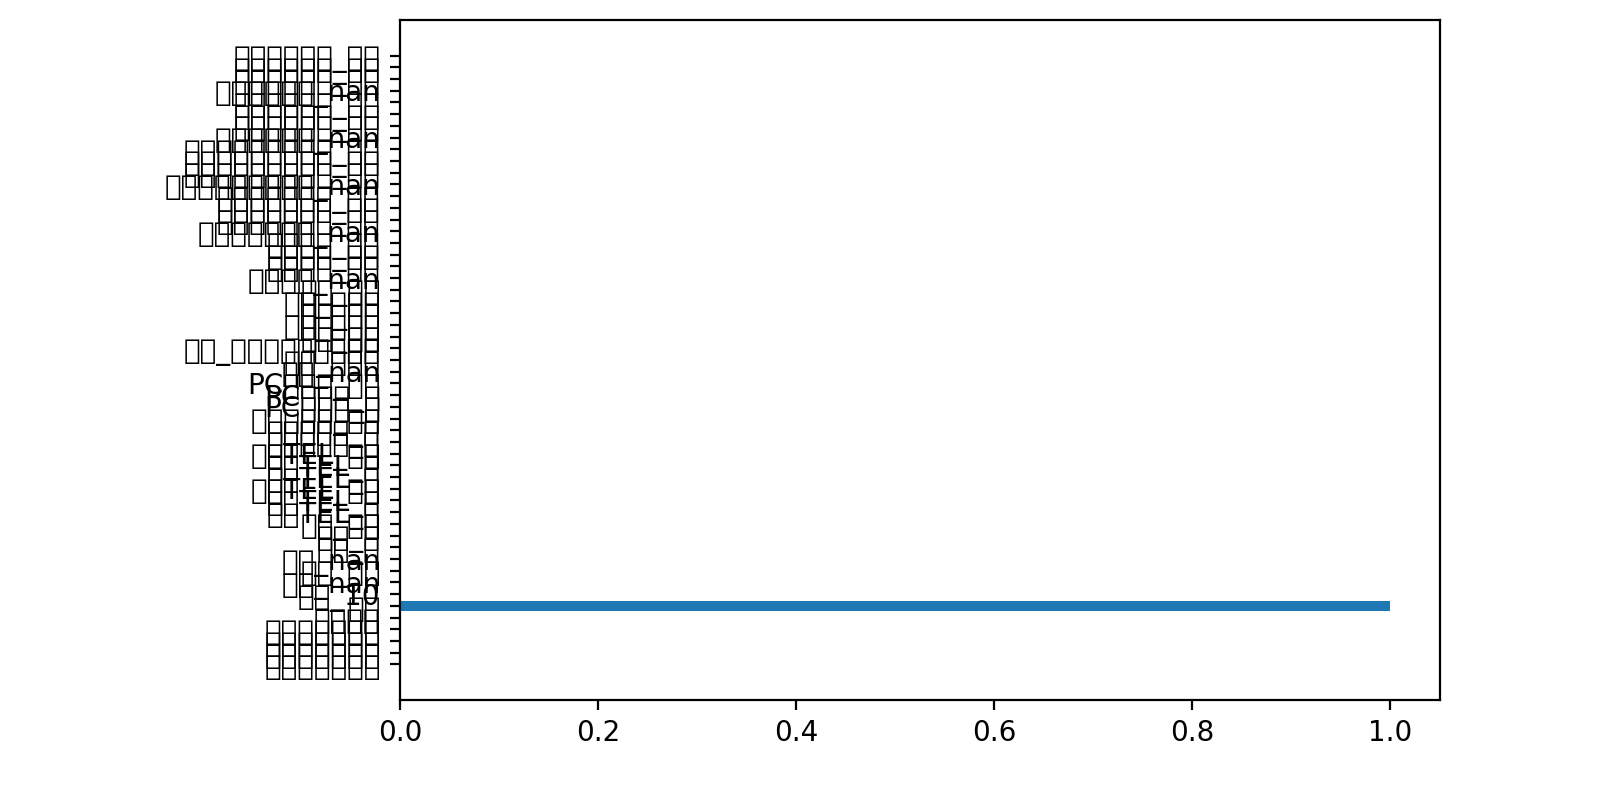

([<matplotlib.axis.YTick at 0x1a2c67eb38>,
 <a list of 53 Text yticklabel objects>)

In [142]:
# 特徴変数評価
plt.figure(figsize = (8, 4))
plt.subplots_adjust(top = 0.975, bottom = 0.125, left = 0.25, right = 0.9)

plt.barh(range(X.shape[1]), ml.coef_)
plt.yticks(np.arange(X.shape[1]), df.columns[1:])

In [143]:
## 予測
y_pred = ml.predict(X_test)
y_pred[:10], y_test[:10]

(array([-1.30339865e-11, -1.50500143e-11, -3.23413630e-11,  1.99246247e-11,
        -1.21285856e-13, -2.76638394e-12, -2.73501522e-11,  1.23824283e-11,
        -3.52717339e-12,  1.76145212e-11]), 3404    0.0
 3249    0.0
 2684    0.0
 4808    0.0
 1331    0.0
 3731    0.0
 1727    0.0
 2488    0.0
 1004    0.0
 1868    0.0
 Name: 売上, dtype: float64)

In [144]:
# 決定係数
ml.score(X_train, y_train), ml.score(X_test, y_test)

(1.0, 1.0)